In [133]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [134]:
dataset = np.load("dataset.npy")
labels = np.load("labels.npy")

In [135]:
dataset = dataset / 255.0  
X = torch.Tensor(dataset) 
y = torch.LongTensor(labels) 

In [136]:
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [137]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, h_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, h_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(h_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = 28 * 28
h_size = 128
num_classes = 10
model = SimpleNN(input_size, h_size, num_classes)

In [138]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Epoch [1/10], Step [100/750], Loss: 2.0863900184631348
Epoch [1/10], Step [200/750], Loss: 1.863132357597351
Epoch [1/10], Step [300/750], Loss: 1.4989051818847656
Epoch [1/10], Step [400/750], Loss: 1.276697039604187
Epoch [1/10], Step [500/750], Loss: 0.9448866844177246
Epoch [1/10], Step [600/750], Loss: 0.9289373755455017
Epoch [1/10], Step [700/750], Loss: 0.7812129855155945
Epoch [2/10], Step [100/750], Loss: 0.5724538564682007
Epoch [2/10], Step [200/750], Loss: 0.6040175557136536
Epoch [2/10], Step [300/750], Loss: 0.7654598355293274
Epoch [2/10], Step [400/750], Loss: 0.39699089527130127
Epoch [2/10], Step [500/750], Loss: 0.4953184425830841
Epoch [2/10], Step [600/750], Loss: 0.6500176191329956
Epoch [2/10], Step [700/750], Loss: 0.5056171417236328
Epoch [3/10], Step [100/750], Loss: 0.5370122790336609
Epoch [3/10], Step [200/750], Loss: 0.5459298491477966
Epoch [3/10], Step [300/750], Loss: 0.37595921754837036
Epoch [3/10], Step [400/750], Loss: 0.38059231638908386
Epoch [3/

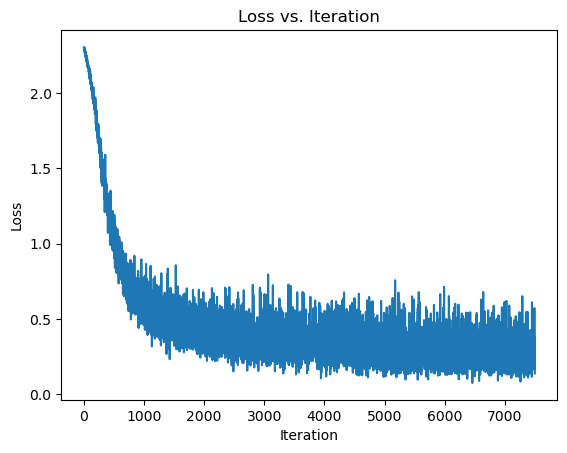

In [139]:

num_epochs = 10
batch_size = 64

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

loss_history = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, input_size)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item()}')
        
        loss_history.append(loss.item())

#Plot
plt.plot(loss_history)
plt.title('Loss vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [140]:
with torch.no_grad():
    X_test = X_test.view(-1, input_size)
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Accuracy on the test set:{accuracy * 100:.2f}%')

Accuracy on the test set:92.40%


In [141]:
from PIL import Image
import os

image_folder = "images" 

def load_and_preprocess_images(image_folder):
    image_data = []

    for filename in os.listdir(image_folder):
        if filename.endswith(".png"):
            image_path = os.path.join(image_folder, filename)
            image = Image.open(image_path)
            image = preprocess_image(image)
            image_data.append(image)

    return image_data

def preprocess_image(image):
    image = image.convert('L')  #convert to grayscale
    image = np.array(image) / 255.0 

    return image

In [142]:
predictions = []

image_data = load_and_preprocess_images(image_folder)
for image in image_data:
    #convert to pytorch centre
    image_tensor = torch.Tensor(image).view(1, -1)
    with torch.no_grad():
        output = model(image_tensor)
        predicted_class = torch.argmax(output).item()
    predictions.append(predicted_class)

    

In [143]:
for i, predicted_class in enumerate(predictions):
    print(f"Image {i+1}: Predicted Digit = {predicted_class}")

Image 1: Predicted Digit = 5
Image 2: Predicted Digit = 6
Image 3: Predicted Digit = 8
Image 4: Predicted Digit = 8
Image 5: Predicted Digit = 3
